Write a Python Code to implement perceptron algorithm for AND Gate. For activation use i)Step Function ii)Sigmoid Function.
Show the comparison of the resultant classifier in one plot(use subplot).

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

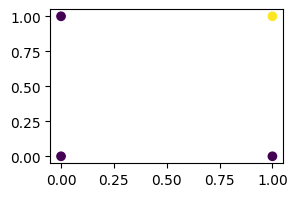

In [25]:
plt.figure(figsize=(3,2))
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [12]:
def step_function(x):
    return np.where(x >= 0, 1, 0)

In [13]:
def sigmoid_function(x):
    return 1 / (1 + np.exp(-x))

In [14]:
# Perceptron training
def train_perceptron(X, y, activation_func, learning_rate=0.1, epochs=50):
    weights = np.random.rand(X.shape[1])
    bias = np.random.rand()

    for _ in range(epochs):
        for i in range(len(X)):
            # Weighted sum
            z = np.dot(X[i], weights) + bias
            # Activation
            y_pred = activation_func(z)
            y_pred_rounded = np.round(y_pred)  # Round for classification tasks
            # Update weights and bias
            error = y[i] - y_pred_rounded
            weights += learning_rate * error * X[i]
            bias += learning_rate * error

    return weights, bias

In [15]:
weights_step, bias_step = train_perceptron(X, y, step_function)
# Train using sigmoid function
weights_sigmoid, bias_sigmoid = train_perceptron(X, y, sigmoid_function)
# Plotting decision boundaries

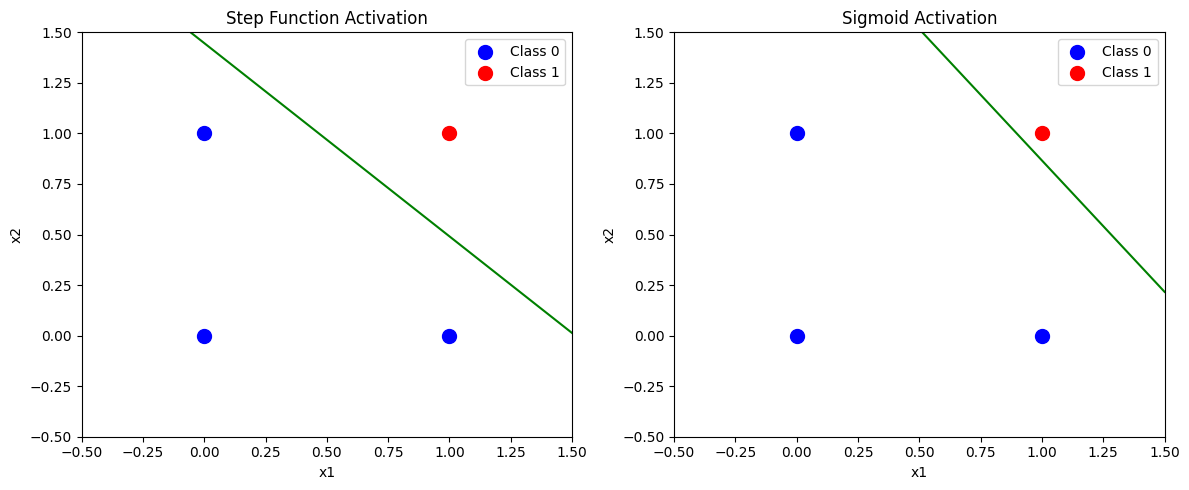

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, (weights, bias, activation_func, title) in zip(
    axes,
    [
        (weights_step, bias_step, step_function, "Step Function Activation"),
        (weights_sigmoid, bias_sigmoid, sigmoid_function, "Sigmoid Activation"),
    ],
):
    # Plot data points
    for (x1, x2), target in zip(X, y):
        color = 'blue' if target == 0 else 'red'
        ax.scatter(x1, x2, color=color, s=100, label=f"Class {target}")

    # Filter duplicate labels for the legend
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    ax.legend(unique_labels.values(), unique_labels.keys())

    # Plot decision boundary
    x_vals = np.linspace(-0.5, 1.5, 100)
    y_vals = -(weights[0] * x_vals + bias) / weights[1]
    ax.plot(x_vals, y_vals, color="green", label="Decision Boundary")
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_title(title)
    ax.set_xlabel("x1")
    ax.set_ylabel("x2")

plt.tight_layout()
plt.show()